In [1]:
import fairlib
import torch
import numpy as np

In [2]:
default_args = {
    "results_dir" : r"..\Results",
    "project_dir" : "Bios_both",
    "checkpoint_dir": "models",
    "checkpoint_name": "checkpoint_epoch",
}

In [3]:
from fairlib.src.analysis.utils import get_dir

exp_dirs = get_dir(
    results_dir=default_args["results_dir"], 
    project_dir=default_args["project_dir"],
    checkpoint_dir=default_args["checkpoint_dir"],
    checkpoint_name=default_args["checkpoint_name"],
    model_id = "test",
    )

In [4]:
exp_dirs[0]["dir"][:5]

['..\\Results\\Bios_both\\test\\models\\checkpoint_epoch0.00.pth.tar',
 '..\\Results\\Bios_both\\test\\models\\checkpoint_epoch0.70.pth.tar',
 '..\\Results\\Bios_both\\test\\models\\checkpoint_epoch1.00.pth.tar',
 '..\\Results\\Bios_both\\test\\models\\checkpoint_epoch1.70.pth.tar',
 '..\\Results\\Bios_both\\test\\models\\checkpoint_epoch10.00.pth.tar']

In [5]:
professions = ["accountant", "architect", "attorney", "chiropractor", "comedian", "composer", "dentist", "dietitian", "dj", "filmmaker", "interior_designer", "journalist", "model", "nurse", "painter", "paralegal", "pastor", "personal_trainer", "photographer", "physician", "poet", "professor", "psychologist", "rapper", "software_engineer", "surgeon", "teacher", "yoga_teacher"]

In [6]:
professions[21]

'professor'

In [7]:
# Load epoch results
epoch_results = {}
for _k in exp_dirs[0]["dir"]:
    epoch_results[_k.split("checkpoint_epoch")[1][:-8]] = torch.load(_k)

In [8]:
print(epoch_results["9.00"].keys())

dict_keys(['epoch', 'epochs_since_improvement', 'loss', 'valid_confusion_matrices', 'test_confusion_matrices', 'dev_evaluations', 'test_evaluations', 'dev_predictions', 'test_predictions'])


In [9]:
from fairlib.src.evaluators.evaluator import confusion_matrix_based_scores

In [10]:
distinct_groups = [0,1,2,3]

print(epoch_results["9.00"]["valid_confusion_matrices"].keys())

dict_keys(['overall', 0, 1, 2, 3])


In [11]:
epoch_tprs = {}
for epoch_id in epoch_results.keys():
    tprs = []
    for g_id in distinct_groups:
        g_tpr = confusion_matrix_based_scores(epoch_results[epoch_id]["valid_confusion_matrices"][g_id])["TPR"]
        tprs.append(g_tpr)
    epoch_tprs[epoch_id] = np.stack(tprs)

In [12]:
# num of groups * num of classes
epoch_tprs["9.00"].shape

(4, 28)

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

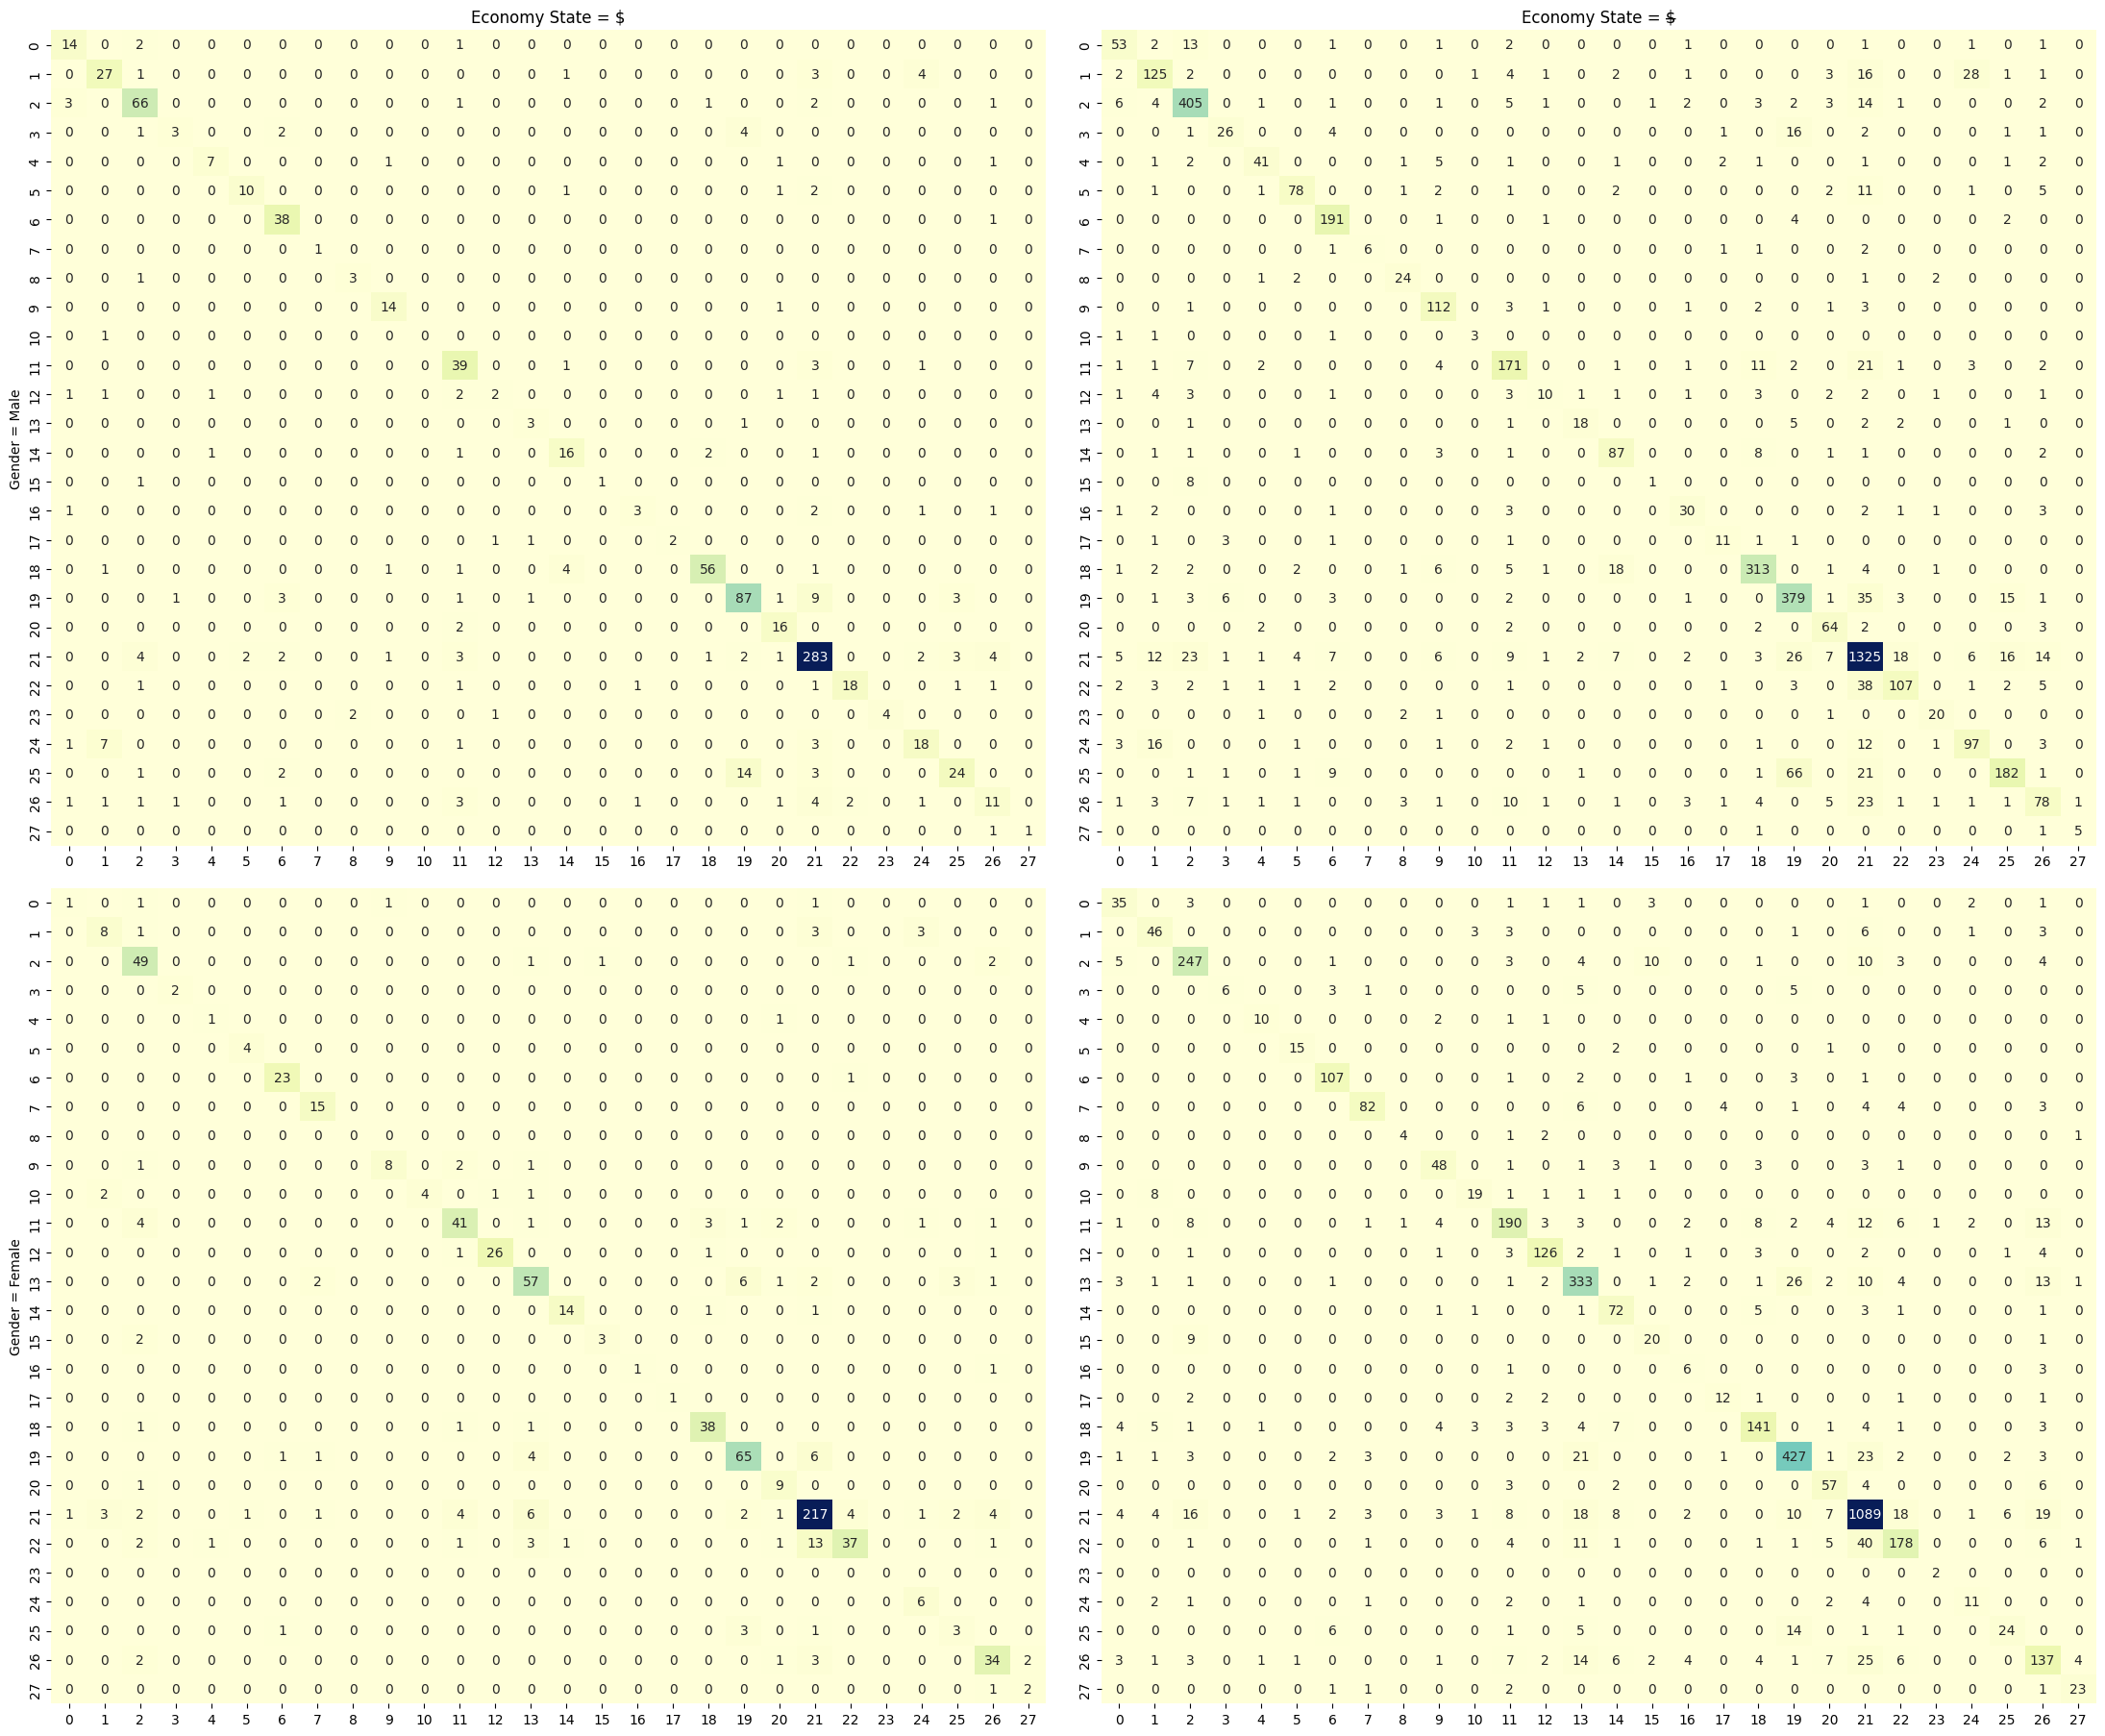

In [14]:
# sns.heatmap(epoch_tprs["5.00"], ax=a1, vmin=0, vmax=1, cbar_ax=cbar_ax)
f, ax = plt.subplots(2, 2, figsize=(22, 18))
f.tight_layout()

sns.heatmap(epoch_results["9.00"]["valid_confusion_matrices"][0], ax=ax[0][0],annot=True, fmt="d", cbar=False, cmap="YlGnBu")
sns.heatmap(epoch_results["9.00"]["valid_confusion_matrices"][1], ax=ax[0][1],annot=True, fmt="d", cbar=False, cmap="YlGnBu")
sns.heatmap(epoch_results["9.00"]["valid_confusion_matrices"][2], ax=ax[1][0],annot=True, fmt="d", cbar=False, cmap="YlGnBu")
sns.heatmap(epoch_results["9.00"]["valid_confusion_matrices"][3], ax=ax[1][1],annot=True, fmt="d", cbar=False, cmap="YlGnBu")

ax[0,0].set_title("Economy State = $")
ax[0,1].set_title("Economy State = $\u0336")

ax[0,0].set_ylabel("Gender = Male")
ax[1,0].set_ylabel("Gender = Female")

f.savefig("subset_confusion_matrics.pdf", format="pdf", dpi=960, bbox_inches="tight") 